# Rental Housing Affordability Analysis - Yusing Chan
# Problem
Do high income inequality and low high school graduation rate decrease rental housing affordability for Americans? 



# Context 
Income inequality is an increasingly urgent issue today.  Education is an important component for obtaining employment and income, and it's difficult to do so without one. The price of rental housing has been increasing, together with stagnant income, housing has become more and more unaffordable for most Americans. 


# Metrics/Methodology 

1. Household income Distribution is measured by income skewness coefficient calculated with Pearson's skewness formula: 3*(mean - median)/ standard deviation. A coefficient higher than 1 means the data is highly skewed, or in this case, income is not distributed evenly. 


2. Rent affordability is measured by rent GT30 and rent GT50. 
        Rent GT 30 is the empirical distribution value that an individual’s rent was greater than 30% of their household income in the past 12 months. 
        Rent GT 50 is the empirical distribution value that an individual’s rent was greater than 50% of their household income in the past 12 months. 

3. High School Graduation Rate: 
The national average high school graduation rate is 89%.






In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats

%matplotlib inline

pd.options.display.float_format = '{:.1%}'.format

In [2]:
df = pd.read_csv('real_estate_db_edited.csv',encoding='latin-1') 
print(df.shape)
#explain rows and columns 

(39030, 20)


# Data Cleansing

In [3]:
df.isna().sum()

state                   0
city                    0
zip_code                0
lat                     0
lng                     0
rent_mean             462
rent_median           462
rent_stdev            462
rent_sample_weight    462
rent_samples          462
rent_gt_30            463
rent_gt_50            463
hi_mean               390
hi_median             390
hi_stdev              390
hi_sample_weight      390
hi_samples            390
hs_degree             275
hs_degree_male        289
hs_degree_female      328
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isna().sum()

state                 0
city                  0
zip_code              0
lat                   0
lng                   0
rent_mean             0
rent_median           0
rent_stdev            0
rent_sample_weight    0
rent_samples          0
rent_gt_30            0
rent_gt_50            0
hi_mean               0
hi_median             0
hi_stdev              0
hi_sample_weight      0
hi_samples            0
hs_degree             0
hs_degree_male        0
hs_degree_female      0
dtype: int64

In [6]:
print(df.shape)

(38552, 20)


# Metric 1: High School Graduation Rate

The national average high school graduation rate is 89%.

Do states with higher graduation rate have higher income?

# Median Hish School Graduation Rate Per State

In [7]:
hs_all="{:.0%}".format(round(df.loc[:,"hs_degree"].median(),2))
print("The overall median high school graduation rate for all states in the dataset is " + str(hs_all)) 

The overall median high school graduation rate for all states in the dataset is 89%


In [9]:
hs=df.groupby('state')['hs_degree'].median().reset_index()
hs.sort_values(by=['hs_degree'], ascending=False, inplace=True)
hs.style.hide_index()
hs

,state,hs_degree
5,Colorado,94.0%
45,Utah,93.4%
11,Hawaii,93.3%
51,Wyoming,93.1%
27,Nebraska,93.1%
26,Montana,93.1%
23,Minnesota,93.0%
29,New Hampshire,93.0%
6,Connecticut,92.9%
1,Alaska,92.9%


# High School Graduation Rate male and female comparison 

In [10]:
hss=df.groupby('state')['hs_degree_male', 'hs_degree_female'].median().reset_index()
hss.sort_values(by=['hs_degree_female'], ascending=False, inplace=True)
hss

/Users/YSC/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,state,hs_degree_male,hs_degree_female
5,Colorado,93.4%,94.4%
23,Minnesota,92.5%,94.0%
29,New Hampshire,91.5%,93.8%
26,Montana,92.4%,93.8%
27,Nebraska,92.8%,93.6%
45,Utah,93.4%,93.5%
1,Alaska,92.3%,93.3%
6,Connecticut,92.5%,93.3%
46,Vermont,90.7%,93.2%
19,Maine,90.1%,93.2%


## Insights: <span style="color:green">

There isn't a strong difference between female and male high school graduation rate across states.

# Metric 2: Rent affordability measured by rent GT30 and rent GT50.

How much do people spend on rent as a percentage of their income?

Do people from states with lower high school graduation rate tend to spend more of their income on rent?

Rent GT 30 Per State: Rent GT 30 is the empirical distribution value that an individual’s rent was greater than 30% of their household income in the past 12 months.

Rent GT 50 Per State: Rent GT 50 is the empirical distribution value that an individual’s rent was greater than 50% of their household income in the past 12 months.

In [11]:
r30=df.groupby('state')['rent_gt_30'].median().reset_index()
r30.sort_values(by=['rent_gt_30'], ascending=False, inplace=True)
r30

,state,rent_gt_30
39,Puerto Rico,58.5%
9,Florida,57.3%
4,California,57.2%
11,Hawaii,56.7%
32,New York,53.9%
24,Mississippi,53.9%
30,New Jersey,53.9%
37,Oregon,52.8%
22,Michigan,52.6%
10,Georgia,52.4%


In [12]:
r50=df.groupby('state')['rent_gt_50'].median().reset_index()
r50.sort_values(by=['rent_gt_50'], ascending=False, inplace=True)
r50.head(10)

,state,rent_gt_50
39,Puerto Rico,32.2%
4,California,28.7%
32,New York,28.6%
9,Florida,28.0%
37,Oregon,27.6%
18,Louisiana,27.4%
11,Hawaii,27.3%
30,New Jersey,26.9%
22,Michigan,26.7%
24,Mississippi,26.5%


# Metric 3: Income Skewness Coefficient 

Pearson’s skewness: 3*(mean - median)/standard deviation 

Do states with lower high school graduation rate have higher income skewness coefficient?

Do states with higher income skewness coefficient have higher rent GT30? 

In [13]:
df['skewness'] = 3*(df.hi_mean - df.hi_median)/df.hi_stdev
income=df.groupby('state')['hi_mean','hi_median','skewness'].median().reset_index()
income.sort_values(by=['skewness'], ascending=False, inplace=True)
income

/Users/YSC/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,state,hi_mean,hi_median,skewness
39,Puerto Rico,2545093.7%,1797600.0%,87.9%
24,Mississippi,4844436.5%,3554200.0%,85.5%
18,Louisiana,5642985.6%,4190500.0%,83.8%
49,West Virginia,5215312.3%,4034200.0%,80.9%
0,Alabama,5195023.1%,3928600.0%,80.7%
31,New Mexico,5687518.6%,4311000.0%,80.2%
3,Arkansas,5087403.5%,3833500.0%,79.6%
26,Montana,5897522.6%,4560600.0%,79.1%
41,South Carolina,5466882.8%,4267900.0%,77.9%
9,Florida,5780786.6%,4547500.0%,77.7%


## Insights: <span style="color:green">

States with lower median household income tend to have higher skewness coefficent meaning income is not distrubuted evenly but instead concentrated. 
Median Income Histograms Comparison Between Three States with Different Skewness Coefficient: Louisiana - high, California - Medium, Massachusetts - Low 

(array([0.0e+00, 5.0e-06, 1.0e-05, 1.5e-05, 2.0e-05, 2.5e-05]),
 <a list of 6 Text yticklabel objects>)

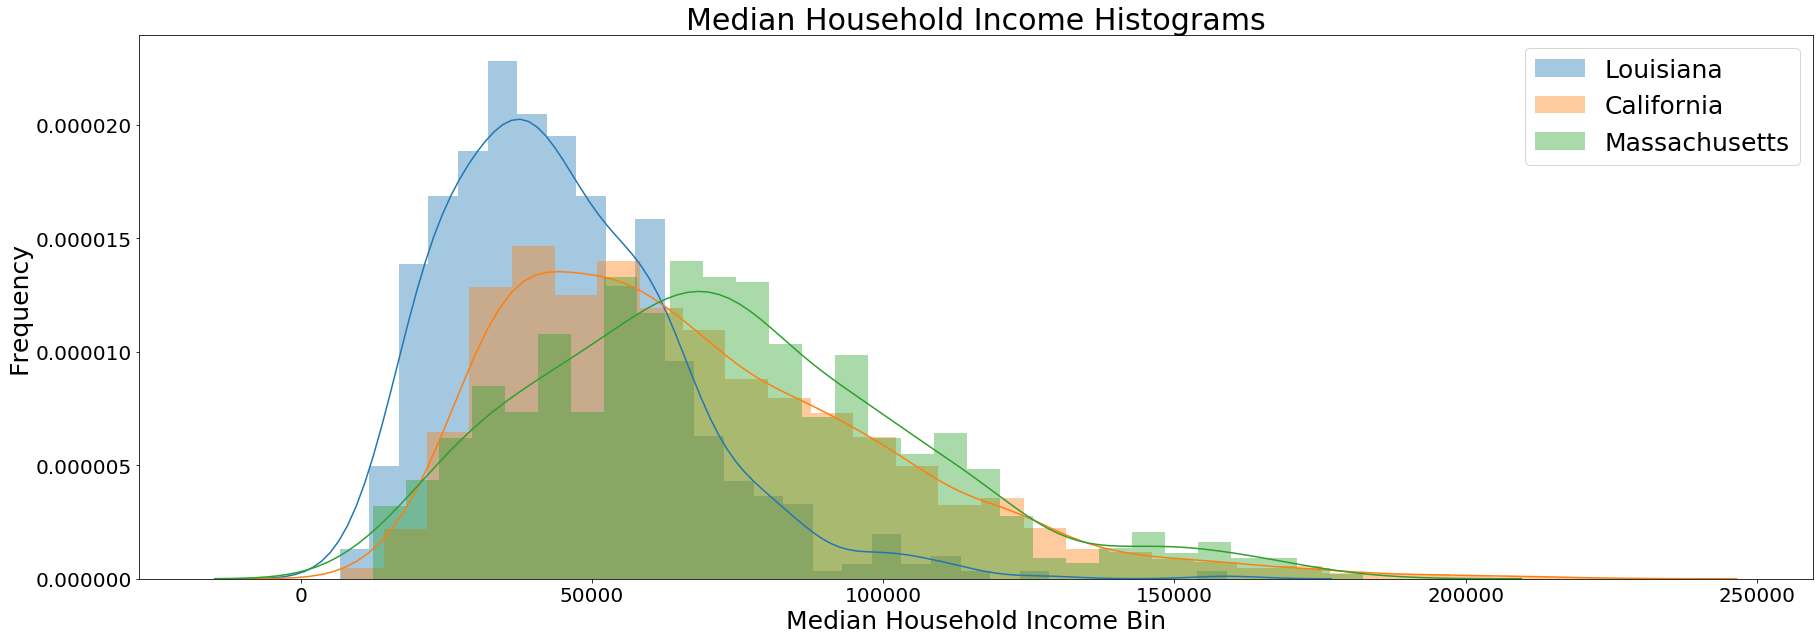

In [14]:
L=df['state']=='Louisiana'
C=df['state']=='California'
M=df['state']=='Massachusetts'
df_L = df[L]
df_C = df[C]
df_M = df[M]

plt.figure(figsize=(30,10))
sns.distplot(df_L['hi_median'], label='Louisiana', bins = 30)
sns.distplot(df_C['hi_median'], label='California', bins = 30)
sns.distplot(df_M['hi_median'], label='Massachusetts', bins = 30)

plt.title('Median Household Income Histograms', size = 30)
plt.xlabel('Median Household Income Bin', size = 25)
plt.ylabel('Frequency', size = 25)
plt.legend(loc='upper right', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

## Insights: <span style="color:green">

Louisiana has an income skewness coefficient of 0.838 which is reflected in the histogram here where the data is concentrated on the lower end of income spectrum. The majority of people from earn low wages. 

California has an income skewness coefficient of 0.717 which is lower than Louisiana and is relfected in the histogram where there are more distributions of higher income. 

Massachusetts has an income skewness coefficient of 0.685 which is relfected in the histogram where the data is less concentrated on the lower end and it's less steep. The majoarity of people from Massachusetts are eaning decent income.

# Louisiana Income Map

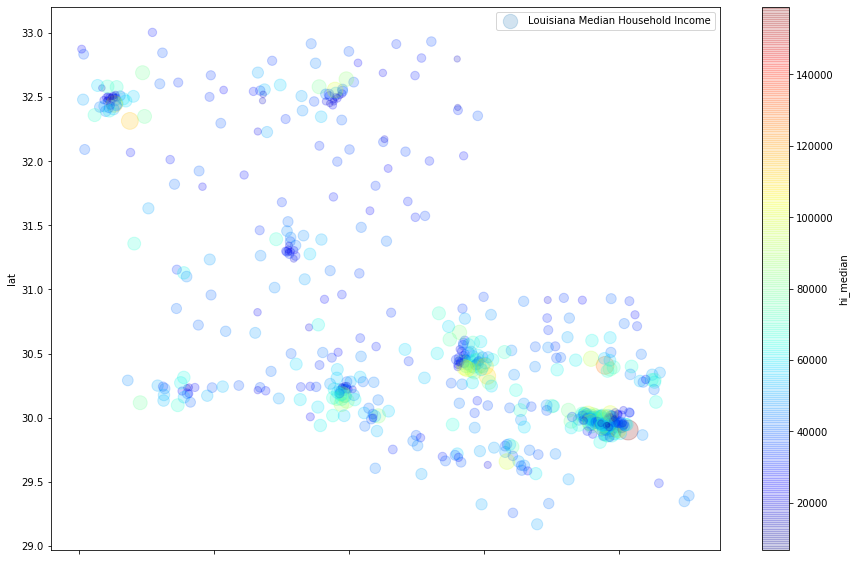

In [15]:
df_L.plot(kind="scatter", x="lng", y="lat",
          s=df_L['hi_median']/400,label="Louisiana Median Household Income",
          c="hi_median", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.2, figsize=(15,10),
)
plt.legend()
plt.show()

# Insights

Lower income throught the state with few high income hotspots.

# California Income Map

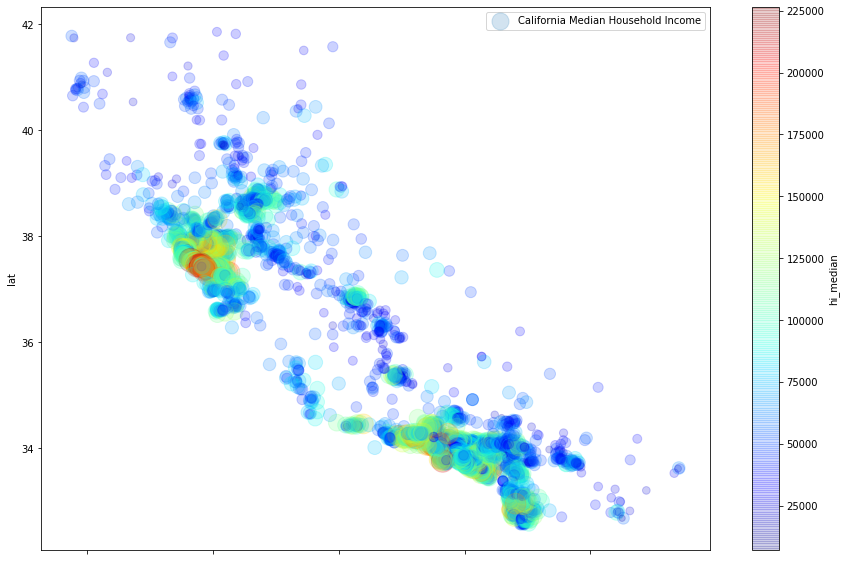

In [16]:
df_C.plot(kind="scatter", x="lng", y="lat",
          s=df_C['hi_median']/400,label="California Median Household Income",
          c="hi_median", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.2, figsize=(15,10),
)
plt.legend()
plt.show()

# Insights

High incomes are concentrated around SF and LA areas. 

# Massachusetts Income Map

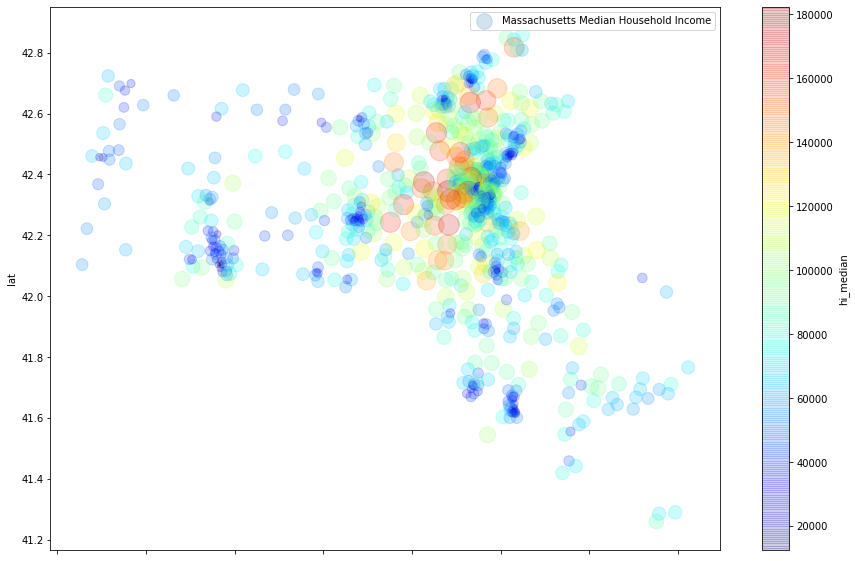

In [17]:
df_M.plot(kind="scatter", x="lng", y="lat",
          s=df_M['hi_median']/400,label="Massachusetts Median Household Income",
          c="hi_median", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.2, figsize=(15,10),
)
plt.legend()
plt.show()

# Insights

High incomes are concentrated around Boston area. Fewer low income clusters.

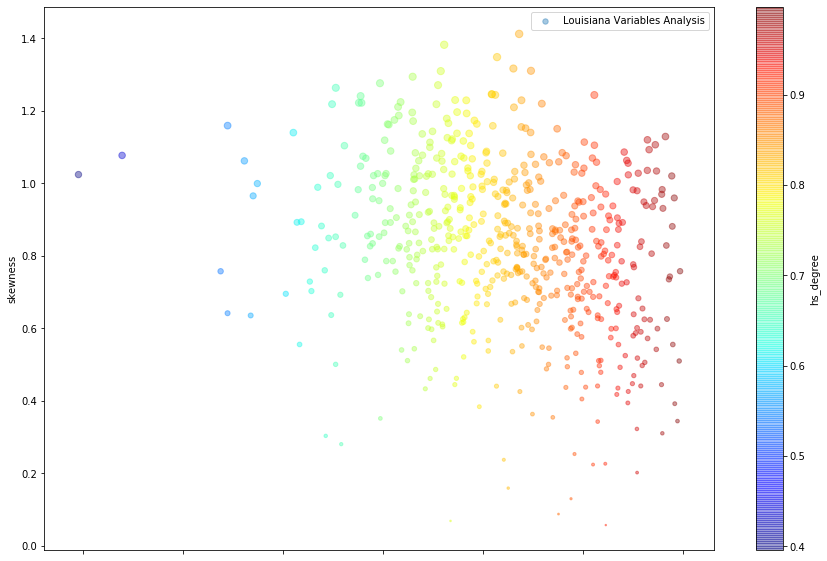

In [18]:
# Louisiana Variable Analysis

df_L.plot(kind="scatter", x="hs_degree", y="skewness",
          s=df_L['skewness']*40,label="Louisiana Variables Analysis",
          c="hs_degree", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(15,10),
)
plt.legend()
plt.show()

/Users/YSC/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


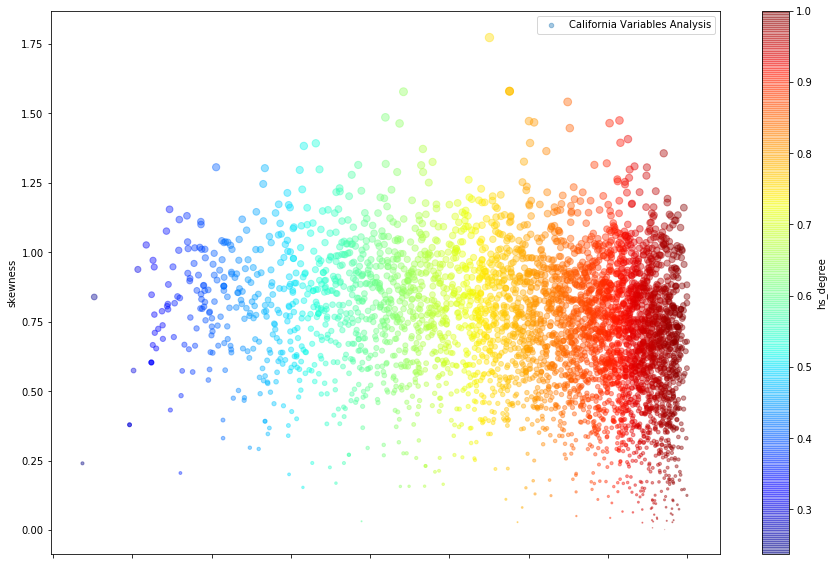

In [19]:
# California Variable Analysis

df_C.plot(kind="scatter", x="hs_degree", y="skewness",
          s=df_C['skewness']*40,label="California Variables Analysis",
          c="hs_degree", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(15,10),
)
plt.legend()
plt.show()

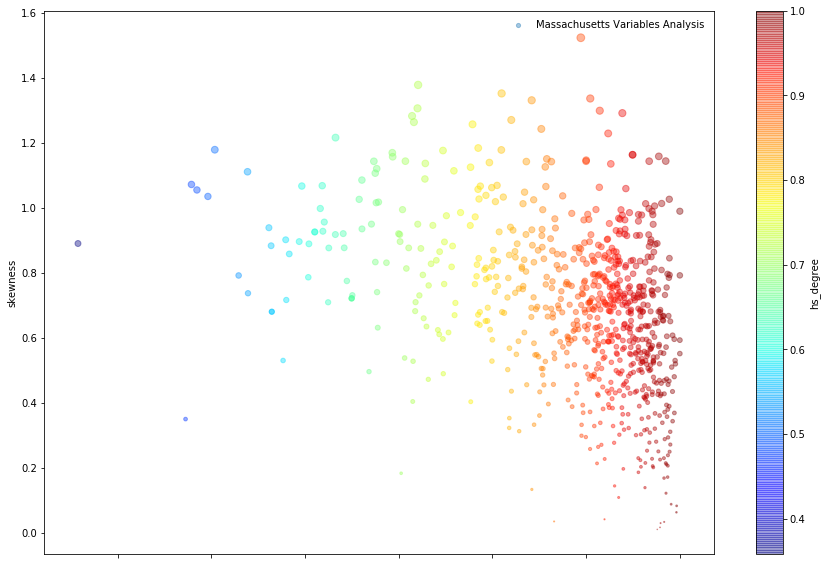

In [20]:
# Massachusetts Variable Analysis

df_M.plot(kind="scatter", x="hs_degree", y="skewness",
          s=df_M['skewness']*40,label="Massachusetts Variables Analysis",
          c="hs_degree", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(15,10),
)
plt.legend(frameon=False)
plt.show()

/Users/YSC/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


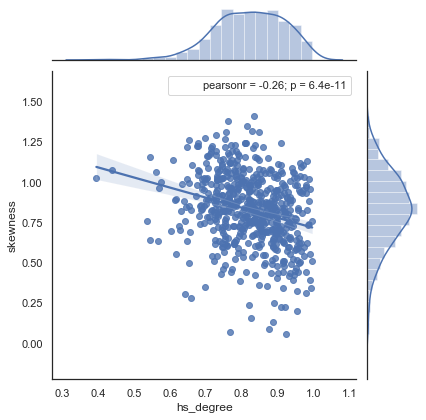

In [21]:
# Louisiana Variable Analysis
sns.set(style="white")
sns.jointplot(x="hs_degree", y="skewness", data=df_L, kind="reg").annotate(stats.pearsonr)

/Users/YSC/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


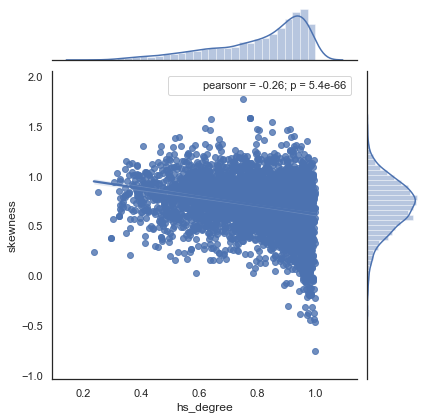

In [22]:
# California Variable Analysis
sns.set(style="white")
sns.jointplot(x="hs_degree", y="skewness", data=df_C, kind="reg").annotate(stats.pearsonr)

/Users/YSC/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


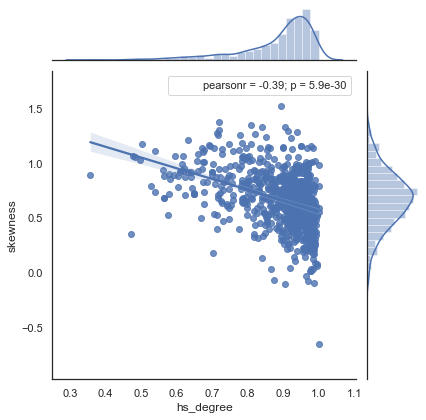

In [23]:
# Massachusetts Variable Analysis
sns.set(style="white")
sns.jointplot(x="hs_degree", y="skewness", data=df_M, kind="reg").annotate(stats.pearsonr)

# Conclusions

1. Education
In today's competitive market, a high school diploma is a bare minimum requirement. A college education is often required to obtain employment. Places with lower graduation rates tend to have higher inequality. Probably because people without the degree mostly work at jobs that pay minimum wages where room for income raise is limited. In todat's competitive market, high school diploma is the minimum requirement. Often times college education is required. 

Why do some states have lower graduation rate?



2. Income Equality
Income inequality is hurting people with and without education. It's also diminishing the range of the middle class, and making it extremely difficult for the poor to move upward. Income inequality is hurting people with and without education. 

Why do some states have higher income inequality?



3. Rent Control
A lack of rent control and concentrated wealth have allowed rent prices to spike in metropolitan areas, gentrified neighborhoods, and dispersed long-term residents. In certain areas, more than 80% of the residents with education and high income still spent more than 30% of their income on rent. 

Who do some states have more affordable rentals?